# 1. Import packages

In [1]:
from my_functions import *
import my_functions

In [2]:
importlib.reload(my_functions)

<module 'my_functions' from '/home/user/jupyterlab/phm5004/notebooks/5010/my_functions.py'>

In [ ]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# 2. Loading data

In [3]:
# Step 1: Load the train and test gene expression and target data
X_train = pd.read_csv('array_exp_all_genes.csv')
X_train_pc = pd.read_csv('array_exp_pc_genes.csv')
target_train = pd.read_csv('array_pheno.csv')
X_test = pd.read_csv('seq_exp_all_genes.csv')
target_test = pd.read_csv('seq_pheno.csv')

In [ ]:
X_test_pc

,ENSG00000000460,ENSG00000000938,ENSG00000001084,ENSG00000001167,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000277224,ENSG00000277443,ENSG00000277791,ENSG00000278053,ENSG00000278311,ENSG00000278540,ENSG00000278588,ENSG00000278615,ENSG00000278705,ENSG00000278828
0,2.423745,8.345937,4.533923,5.191937,4.304173,4.630103,3.954983,5.125293,3.286782,5.825916,...,4.968352,6.924312,4.062375,4.949859,6.074439,3.994109,2.365265,3.034046,2.496975,6.035486
1,3.847121,6.224957,4.250065,4.656698,3.980122,4.838110,5.236174,5.647764,3.168740,4.704956,...,5.888299,6.590824,4.952952,5.769343,5.615779,3.503869,3.485657,3.968800,4.393332,8.028557
2,5.012187,5.810335,5.395915,4.164869,4.363797,4.931780,5.937943,6.105281,3.189926,5.199117,...,6.109231,6.157657,5.604286,4.892976,5.772084,4.084270,3.519929,4.183978,3.308084,8.556017
3,3.791153,6.902508,3.370958,4.568590,5.536241,4.062350,5.292534,5.657288,4.783150,5.107926,...,6.411357,5.072340,4.161025,5.168576,5.694460,4.140335,1.581859,3.697621,2.763199,7.970789
4,2.916634,7.366639,4.809254,5.244618,3.613039,5.383460,5.202661,5.362660,3.362576,6.325000,...,5.366911,7.220994,5.454264,4.135997,5.483506,3.436641,4.174084,4.485822,4.972349,6.972327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.239820,7.159501,5.978339,3.595145,4.161908,4.962298,5.248243,4.621069,1.200017,5.859849,...,5.747121,7.453037,4.971771,4.232649,5.596146,1.261312,2.909502,6.508126,4.803633,5.631880
236,3.528139,6.381450,5.375474,5.851308,4.626757,5.729898,6.350935,6.159995,4.747431,6.926531,...,5.820338,6.611462,5.178574,5.102317,5.905084,3.853712,4.204150,5.824002,5.026804,8.133788
237,1.479388,6.903496,5.321848,1.234770,3.410142,4.406406,1.644968,7.179595,3.938324,6.224849,...,5.177386,6.416176,5.132487,5.104612,5.907468,1.155364,0.936905,6.538966,3.582641,7.149558
238,3.149675,6.079520,4.905362,5.138804,2.979567,4.615495,5.644921,5.847144,3.109872,6.136913,...,5.364713,6.104588,6.116689,4.885659,6.230543,3.965171,4.079122,4.824782,3.700130,7.731955


In [4]:

# Convert the target labels in both the training and test data
target_train['target'] = target_train['disease_status'].map({'pre-eclampsia': 1, 'control': 0})
target_test['target'] = target_test['disease_status'].map({'pre-eclampsia': 1, 'control': 0})


# get y_train, y_test
y_train = target_train['target']
y_test = target_test['target']

In [5]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_train_pc)

array([[ 0.70232003, -0.69509009, -0.25722148, ..., -0.05557887,
         1.13878504,  1.1252473 ],
       [-1.33764183, -0.2824366 ,  0.06979416, ..., -0.5295787 ,
        -0.02535674, -0.0653403 ],
       [-0.92587697,  1.06883023,  0.04251179, ...,  0.1576362 ,
        -0.19187115,  1.15752424],
       ...,
       [ 1.83227523, -0.97307996,  0.55054359, ..., -0.86015314,
        -0.50128216, -0.155162  ],
       [-0.19626066, -1.25991356, -0.44566582, ..., -0.88153618,
        -0.02411997, -0.67943887],
       [-0.09515449, -0.32863062,  0.35566633, ...,  0.4854826 ,
        -0.98982613,  0.13939934]])

## 2.2 map output labels

In [ ]:
target_train['platform'] = ['Microarray' if i < 110 else 'RNA-seq' for i in range(len(target_train))]
target_test['platform'] = ['Microarray' if i < 47 else 'RNA-seq' for i in range(len(target_test))]
# Convert the target labels in both the training and test data
target_train['platform'] = target_train['platform'].map({'Microarray': 1, 'RNA-seq': 0})
target_test['platform'] = target_test['platform'].map({'Microarray': 1, 'RNA-seq': 0})

# get y_train, y_test
# y_train = target_train['platform']
# y_test = target_test['platform']

## 2.3 Compute class weights

In [6]:
# compute model weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = {i: class_weights[i] for i in np.unique(y_train)}

# 3. ML training

In [7]:
# define model
# Example of how to call the function with XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', n_jobs=-1, random_state=0, scale_pos_weight=class_weights[1])  # Use scale_pos_weight for imbalance in XGBoost

rf_model = RandomForestClassifier(random_state=0, class_weight=weights)

# SVM with class weights
svm_model = SVC(random_state=0, class_weight=weights, probability=True)

# Logistic Regression with class weights
logistic_model = LogisticRegression(solver='saga', random_state=0, class_weight=weights, max_iter=1000)  # Use 'saga' to support both L1 and L2

# Ridge Logistic Regression with class weights
ridge_model = LogisticRegression(penalty='l2', solver='saga', random_state=0, class_weight=weights, max_iter=1000)  # Use L2 penalty for Ridge

# Lasso Logistic Regression with class weights
lasso_model = LogisticRegression(penalty='l1', solver='saga', random_state=0, class_weight=weights, max_iter=1000)  # Use L1 penalty for Lasso

# KNN Model (class weights do not apply)
knn_model = KNeighborsClassifier(n_jobs=-1)

# MLP Model (class weights do not apply)
mlp_model = MLPClassifier(random_state=0, max_iter=10000)

## 3.2 Full features training

### 3.2.8 Logistic regression (Ridge) with f1 scoring

In [ ]:
# Train Ridge Logistic Regression
array_best_rlr_model_f1, array_rlr_best_params_f1 = train_model_with_gridsearch_f1_no_test(
    ridge_model, ridge_param_grid, X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarn

Training Accuracy: 1.0
Training F1-Weighted Score: 1.0
Confusion Matrix:
[[110   0]
 [  0  47]]
Best Hyperparameters: {'C': 10.0, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 0.001}


#### 3.2.8.1 Get Ridge feature importance ranking

In [ ]:
# Fit the Best Ridge model 
array_best_rlr_model_f1.fit(X_train, y_train)

# Get importance scores (absolute values of coefficients)
array_ridge_importance_scores = np.abs(array_best_rlr_model_f1.coef_).sum(axis=0)
array_ridge_selected_features = X_train.columns[array_ridge_importance_scores > 0]
print(f'Ridge Selected Features: {array_ridge_selected_features}')

# Sort Ridge features by their importance scores in descending order
array_sorted_ridge_features = [x for _, x in sorted(zip(array_ridge_importance_scores, X_train.columns), reverse=True)]

Ridge Selected Features: Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000278825', 'ENSG00000278828', 'ENSG00000278839',
       'ENSG00000278843', 'ENSG00000278845', 'ENSG00000278848',
       'ENSG00000278853', 'ENSG00000278855', 'ENSG00000278856',
       'ENSG00000278857'],
      dtype='object', length=23916)


In [ ]:
# save Ridge regression feature ranking as json file
with open('array_sorted_ridge_features.json', 'w') as f:
    json.dump(array_sorted_ridge_features, f)

### 3.2.9 Logistic regression (Ridge) with AUCROC scoring

In [ ]:
array_best_rlr_model_roc, array_rlr_best_params_roc = train_model_with_gridsearch_roc_no_test(
    ridge_model, ridge_param_grid, X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarn

Training Accuracy: 1.0
Train AUC-ROC: 1.0
Confusion Matrix:
[[110   0]
 [  0  47]]


In [ ]:
print(array_rlr_best_params_roc)

{'C': 10.0, 'max_iter': 1000, 'solver': 'liblinear', 'tol': 0.001}


#### 3.2.9.1 Get Ridge AUROC feature importance ranking

In [ ]:
# Fit the Best Ridge model 
array_best_rlr_model_roc.fit(X_train, y_train)

# Get importance scores (absolute values of coefficients)
array_ridge_roc_importance_scores = np.abs(array_best_rlr_model_roc.coef_).sum(axis=0)
array_ridge_roc_selected_features = X_train.columns[array_ridge_roc_importance_scores > 0]
print(f'Ridge Selected Features: {array_ridge_roc_selected_features}')

# Sort Ridge features by their importance scores in descending order
array_sorted_ridge_roc_features = [x for _, x in sorted(zip(array_ridge_roc_importance_scores, X_train.columns), reverse=True)]

Ridge Selected Features: Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000278825', 'ENSG00000278828', 'ENSG00000278839',
       'ENSG00000278843', 'ENSG00000278845', 'ENSG00000278848',
       'ENSG00000278853', 'ENSG00000278855', 'ENSG00000278856',
       'ENSG00000278857'],
      dtype='object', length=23916)


In [ ]:
# save Ridge regression feature ranking as json file
with open('array_sorted_ridge_roc_features.json', 'w') as f:
    json.dump(array_sorted_ridge_roc_features, f)

In [ ]:
array_sorted_ridge_roc_features[:1] == array_sorted_ridge_features[:1]

False

### 3.2.10 Logistic regression (Lasso) with f1 scoring

In [ ]:
# Lasso Logistic Regression
array_best_llr_model_f1, array_llr_best_params_f1 = train_model_with_gridsearch_f1_no_test(
    lasso_model, lasso_param_grid, X_train, y_train)

#### 3.2.10.1 Get Lasso feature importance ranking

In [ ]:
# Fit the Best Lasso model 
array_best_llr_model_f1.fit(X_train, y_train)

# Get importance scores (absolute values of coefficients)
array_lasso_importance_scores = np.abs(array_best_llr_model_f1.coef_).sum(axis=0)
array_lasso_selected_features = X_train.columns[array_lasso_importance_scores > 0]
print(f'Ridge Selected Features: {array_lasso_selected_features}')

# Sort LASSO features by their importance scores in descending order
array_sorted_lasso_features = [x for _, x in sorted(zip(array_lasso_importance_scores, X_train.columns), reverse=True)]

In [ ]:
# save Ridge regression feature ranking as json file
with open('array_sorted_lasso_features.json', 'w') as f:
    json.dump(array_sorted_lasso_features, f)

### 3.2.11 Logistic regression (Lasso) with AUCROC scoring

In [ ]:
array_best_llr_model_roc, array_llr_best_params_roc = train_model_with_gridsearch_roc_no_test(
    lasso_model, lasso_param_grid, X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarn

Training Accuracy: 0.9426751592356688
Train AUC-ROC: 0.9936170212765958
Confusion Matrix:
[[104   6]
 [  3  44]]


#### 3.2.11.1 Get Lasso feature importance ranking from AUCROC

In [ ]:
# Fit the Best Lasso model 
array_best_llr_model_roc.fit(X_train, y_train)

# Get importance scores (absolute values of coefficients)
array_lasso_importance_scores_roc = np.abs(array_best_llr_model_roc.coef_).sum(axis=0)
array_lasso_selected_features_roc = X_train.columns[array_lasso_importance_scores_roc > 0]
print(f'Ridge Selected Features: {array_lasso_selected_features_roc}')

# Sort LASSO features by their importance scores in descending order
array_sorted_lasso_features_roc = [x for _, x in sorted(zip(array_lasso_importance_scores_roc, X_train.columns), reverse=True)]

Ridge Selected Features: Index(['ENSG00000001084', 'ENSG00000001561', 'ENSG00000002933',
       'ENSG00000003096', 'ENSG00000003147', 'ENSG00000003436',
       'ENSG00000004766', 'ENSG00000004799', 'ENSG00000005249',
       'ENSG00000005882',
       ...
       'ENSG00000278776', 'ENSG00000278781', 'ENSG00000278787',
       'ENSG00000278795', 'ENSG00000278803', 'ENSG00000278812',
       'ENSG00000278825', 'ENSG00000278845', 'ENSG00000278848',
       'ENSG00000278857'],
      dtype='object', length=3538)


In [ ]:
# save Ridge regression feature ranking as json file
with open('array_sorted_lasso_features_roc.json', 'w') as f:
    json.dump(array_sorted_lasso_features_roc, f)

# 4. Recursive feature addition
* Recursive addition down the feature importance ranking
* with 10 CV for each feature added

In [ ]:
# Load the sorted_ridge_features from its JSON file back into a list
with open('array_sorted_ridge_features.json', 'r') as f:
    array_sorted_ridge_features = json.load(f)
    
# Load the sorted_ridge_roc_features from its JSON file back into a list
#with open('sorted_ridge_roc_features.json', 'r') as f:
#    sorted_ridge_roc_features = json.load(f)

## 4.2 ridge regression RFA AUC

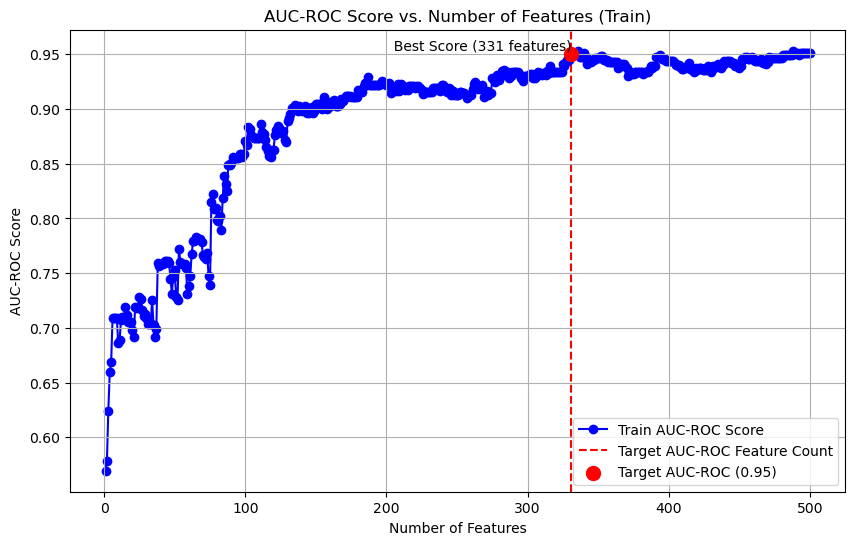

Best Train AUC-ROC Score: 0.9509
Minimum Number of Features for Target AUC-ROC Score: 331
Selected Features for Target AUC-ROC Score: ['ENSG00000137267', 'ENSG00000229314', 'ENSG00000134184', 'ENSG00000116299', 'ENSG00000133048', 'ENSG00000274741', 'ENSG00000273814', 'ENSG00000230847', 'ENSG00000197822', 'ENSG00000167207', 'ENSG00000049247', 'ENSG00000110203', 'ENSG00000078114', 'ENSG00000166435', 'ENSG00000137757', 'ENSG00000200394', 'ENSG00000277400', 'ENSG00000274847', 'ENSG00000188681', 'ENSG00000278384', 'ENSG00000133687', 'ENSG00000115607', 'ENSG00000252135', 'ENSG00000134755', 'ENSG00000202035', 'ENSG00000267634', 'ENSG00000164308', 'ENSG00000212527', 'ENSG00000257017', 'ENSG00000196936', 'ENSG00000276386', 'ENSG00000154529', 'ENSG00000106714', 'ENSG00000252980', 'ENSG00000239823', 'ENSG00000205045', 'ENSG00000162366', 'ENSG00000236177', 'ENSG00000235844', 'ENSG00000231389', 'ENSG00000229685', 'ENSG00000228163', 'ENSG00000224103', 'ENSG00000206291', 'ENSG00000168384', 'ENSG00000

In [ ]:
array_rlr_roc_feature_set = recursive_feature_addition_with_optimized_model_roc(
    array_best_rlr_model_roc,
    array_sorted_ridge_roc_features,
    X_train,
    y_train,
    0.95
)


In [ ]:
# save Ridge regression feature ranking as json file
with open('array_rlr_roc_feature_set.json', 'w') as f:
    json.dump(array_rlr_roc_feature_set, f)

# 5. develop on microarray and test on rnaseq

In [8]:
# Load the sorted_ridge_features from its JSON file back into a list
with open('array_rlr_roc_feature_set.json', 'r') as f:
    array_rlr_roc_feature_set = json.load(f)

In [9]:
X_train = pd.read_csv('array_exp_all_genes.csv')
test_gene = X_test.columns.tolist()
roc_common_gene = [value
               for value in set(test_gene) & set(array_rlr_roc_feature_set)]
print(f"Overlapse number of features in X_test: ", len(roc_common_gene))
roc_f_X_train = X_train[roc_common_gene]
roc_f_X_test = X_test[roc_common_gene]

# Scale
scaler = StandardScaler()
scaler.fit_transform(roc_f_X_train)
scaler.transform(roc_f_X_test)

# compute model weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = {i: class_weights[i] for i in np.unique(y_train)}

Overlapse number of features in X_test:  57


## 5.1 Permutation testing on selected feature

/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarn

Best parameters from GridSearchCV: {'C': 10.0, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Model score (original): 0.8049
Mean permutation score: 0.4973
Empirical p-value: 0.0010


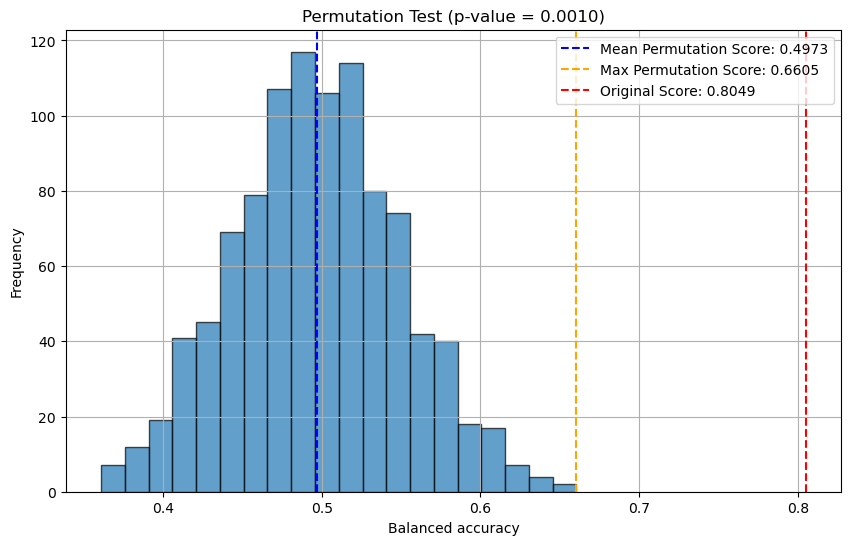

In [ ]:
score, perm_scores, p_value = permutation_test_with_model(
    logistic_model, 
    roc_f_X_train, 
    y_train, 
    param_grid=lr_param_grid, 
    scoring='balanced_accuracy', 
    cv=5, 
    n_permutations=1000, 
    random_state=0)

## 5.2 ML training on features selected using aucroc

/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: P

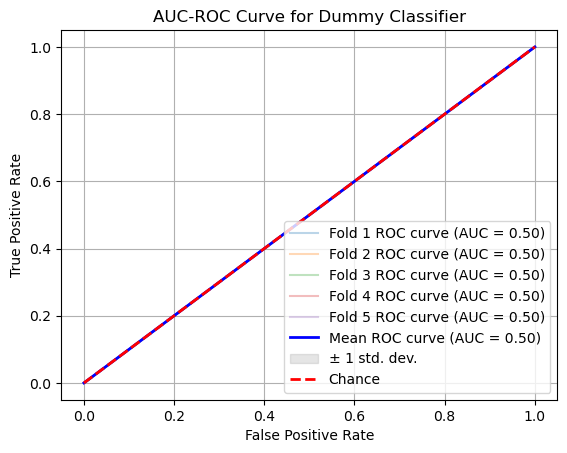

Model: Dummy Classifier
Training Accuracy: 0.5000
Test Accuracy (CV average): 0.7500
Training F1-Weighted Score: 0.3333
Test F1-Weighted Score (CV average): 0.6429
Balanced Accuracy (CV average): 0.5000
Training ROC-AUC Score (CV average): 0.5000
ROC-AUC Score (CV average): 0.5000
Precision (CV average): 0.5625
Recall (CV average): 0.7500
Specificity (CV average): 1.0000
Sensitivity (CV average): 0.0000
False Positive Rate (CV average): 0.0000
Model: Dummy Classifier done
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarn

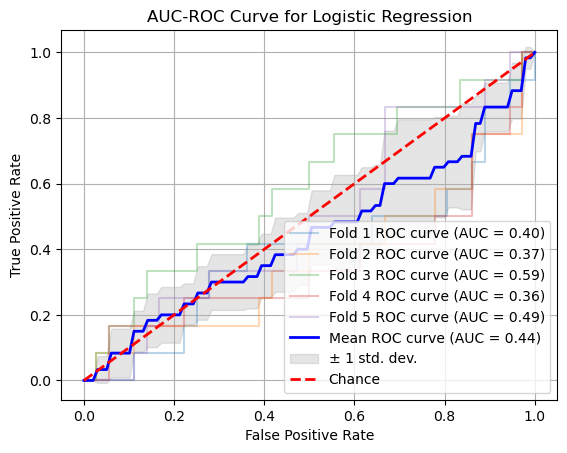

Model: Logistic Regression
Training Accuracy: 0.9182
Test Accuracy (CV average): 0.4792
Training F1-Weighted Score: 0.9176
Test F1-Weighted Score (CV average): 0.4856
Balanced Accuracy (CV average): 0.4306
Training ROC-AUC Score (CV average): 0.8838
ROC-AUC Score (CV average): 0.4424
Precision (CV average): 0.5563
Recall (CV average): 0.4792
Specificity (CV average): 0.5278
Sensitivity (CV average): 0.3333
False Positive Rate (CV average): 0.4722
Model: Logistic Regression done
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_par

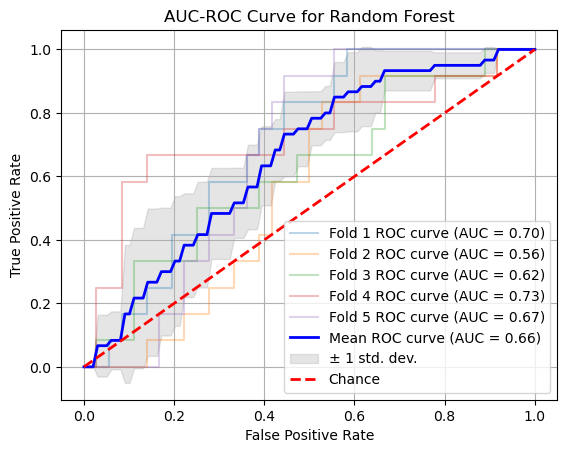

Model: Random Forest
Training Accuracy: 0.9712
Test Accuracy (CV average): 0.6042
Training F1-Weighted Score: 0.9712
Test F1-Weighted Score (CV average): 0.6089
Balanced Accuracy (CV average): 0.4972
Training ROC-AUC Score (CV average): 0.7115
ROC-AUC Score (CV average): 0.6591
Precision (CV average): 0.6214
Recall (CV average): 0.6042
Specificity (CV average): 0.7111
Sensitivity (CV average): 0.2833
False Positive Rate (CV average): 0.2889
Model: Random Forest done
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_par

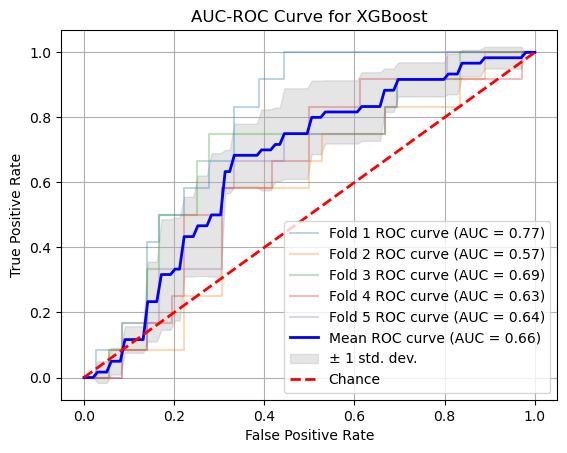

Model: XGBoost
Training Accuracy: 1.0000
Test Accuracy (CV average): 0.6625
Training F1-Weighted Score: 1.0000
Test F1-Weighted Score (CV average): 0.6507
Balanced Accuracy (CV average): 0.5194
Training ROC-AUC Score (CV average): 0.7383
ROC-AUC Score (CV average): 0.6618
Precision (CV average): 0.6454
Recall (CV average): 0.6625
Specificity (CV average): 0.8056
Sensitivity (CV average): 0.2333
False Positive Rate (CV average): 0.1944
Model: XGBoost done
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_par

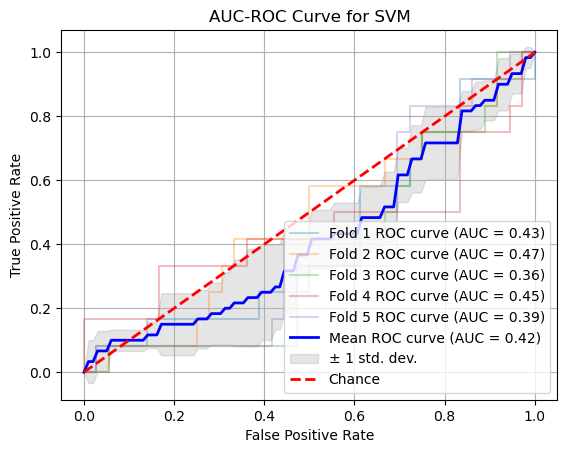

Model: SVM
Training Accuracy: 1.0000
Test Accuracy (CV average): 0.4708
Training F1-Weighted Score: 1.0000
Test F1-Weighted Score (CV average): 0.5052
Balanced Accuracy (CV average): 0.4639
Training ROC-AUC Score (CV average): 0.8923
ROC-AUC Score (CV average): 0.4204
Precision (CV average): 0.5989
Recall (CV average): 0.4708
Specificity (CV average): 0.4778
Sensitivity (CV average): 0.4500
False Positive Rate (CV average): 0.5222
Model: SVM done
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/home/user/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


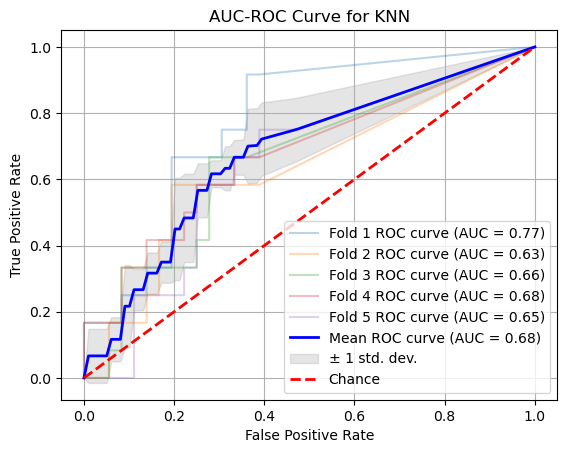

Model: KNN
Training Accuracy: 1.0000
Test Accuracy (CV average): 0.7000
Training F1-Weighted Score: 1.0000
Test F1-Weighted Score (CV average): 0.6689
Balanced Accuracy (CV average): 0.5278
Training ROC-AUC Score (CV average): 0.5904
ROC-AUC Score (CV average): 0.6768
Precision (CV average): 0.6562
Recall (CV average): 0.7000
Specificity (CV average): 0.8722
Sensitivity (CV average): 0.1833
False Positive Rate (CV average): 0.1278
Model: KNN done
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


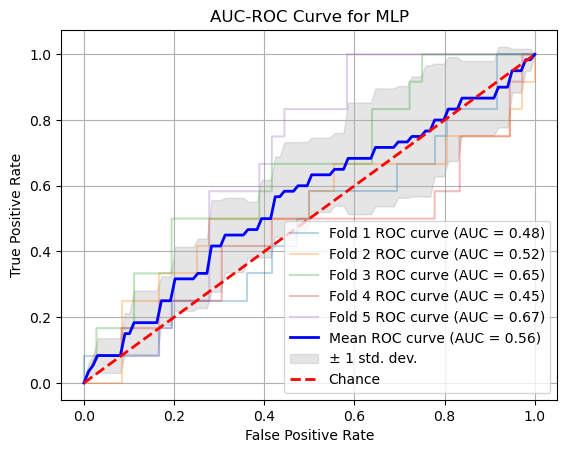

Model: MLP
Training Accuracy: 1.0000
Test Accuracy (CV average): 0.6125
Training F1-Weighted Score: 1.0000
Test F1-Weighted Score (CV average): 0.6012
Balanced Accuracy (CV average): 0.4694
Training ROC-AUC Score (CV average): 0.9041
ROC-AUC Score (CV average): 0.5559
Precision (CV average): 0.5978
Recall (CV average): 0.6125
Specificity (CV average): 0.7556
Sensitivity (CV average): 0.1833
False Positive Rate (CV average): 0.2444
Model: MLP done


In [13]:
dummy_model = None
dummy_grid = None
optimised_models = []
metrics_df = pd.DataFrame(
    {'metrics': ["accuracy_train", "f1_train", "roc_auc_train", "accuracy_test", "f1_test",
                                       "balanced_accuracy", "roc_auc", "precision", "recall","prc_auc", "specificity", 
                                       "sensitivity", "false_positive_rate"]
    }
)

model_iter = pd.DataFrame({
    'model': [dummy_model,logistic_model, rf_model, xgb_model, svm_model, knn_model, mlp_model],
    'param_grid': [dummy_grid,lr_param_grid, rf_param_grid, param_grid_xgb, svm_param_grid, knn_param_grid, mlp_param_grid],
    'model_name': ["Dummy Classifier","Logistic Regression", "Random Forest", "XGBoost", "SVM", "KNN", "MLP"]
})

for index,row in model_iter.iterrows():
    model = row['model']
    param_grid = row['param_grid']
    model_name = row['model_name']
    
    metrics, optim_model, metrics_df_x3 = train_model_with_gridsearch_metrics_all(
        model,
        param_grid,
        model_name,
        metrics_df,
        roc_f_X_train,
        y_train,
        roc_f_X_test,
        y_test,
        dataset='sf',
        scoring='roc_auc'
    )
    if optim_model is not None:  # Ensure the model was returned
        optimised_models.append((model_name, optim_model))
    print(f"Model: {model_name} done")

In [11]:
# Convert the list of optimized models to a dictionary
optimised_models_dict = dict(optimised_models)

# Retrieve the optimized XGBoost model directly
optim_xgb = optimised_models_dict.get("XGBoost")
print(optim_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=0, ...)


In [12]:
print(metrics_df_x3)
metrics_df_x3.to_csv('metrics_df_x3.csv', index=False)

                metrics  Dummy Classifier  Logistic Regression  Random Forest  \
0        accuracy_train          0.500000             0.918182       0.971180   
1              f1_train          0.333333             0.917630       0.971178   
2         roc_auc_train          0.500000             0.883838       0.711515   
3         accuracy_test          0.750000             0.479167       0.604167   
4               f1_test          0.642857             0.485591       0.608929   
5     balanced_accuracy          0.500000             0.430556       0.497222   
6               roc_auc          0.500000             0.442424       0.659091   
7             precision          0.562500             0.556291       0.621397   
8                recall          0.750000             0.479167       0.604167   
9               prc_auc          0.250000             0.269580       0.374888   
10          specificity          1.000000             0.527778       0.711111   
11          sensitivity     

# 6. Differential expression analysis

In [14]:
array_dge = pd.read_csv('array_dge.csv')
print(array_dge)

                  gene         logFC   AveExpr         t   P.Value  adj.P.Val  \
0      ENSG00000266980  1.056084e-01  6.429720  3.971537  0.000108   0.999536   
1      ENSG00000202112  8.507610e-02  4.249299  3.639020  0.000369   0.999536   
2      ENSG00000205485  9.277016e-02  8.532235  3.635829  0.000374   0.999536   
3      ENSG00000207752  9.101887e-02  4.165203  3.510011  0.000583   0.999536   
4      ENSG00000187510 -7.745746e-02  4.783959 -3.414926  0.000810   0.999536   
...                ...           ...       ...       ...       ...        ...   
23911  ENSG00000100918 -1.030615e-05  7.650018 -0.000311  0.999752   0.999877   
23912  ENSG00000091622  7.609675e-06  7.028737  0.000274  0.999782   0.999877   
23913  ENSG00000215533 -2.758351e-05  5.892761 -0.000259  0.999794   0.999877   
23914  ENSG00000207971 -3.491781e-06  5.961869 -0.000148  0.999882   0.999924   
23915  ENSG00000185385 -9.490789e-07  4.501771 -0.000037  0.999971   0.999971   

              B  
0      1.

In [15]:
array_dge['FC'] = 2 ** array_dge['logFC']  # Fold Change
array_dge['absolute_FC'] = array_dge['FC'].abs()  # Absolute Fold Change
dge_sorted_fc = array_dge.sort_values(by='absolute_FC', ascending=False).reset_index(drop=True)
print(dge_sorted_fc)

                  gene     logFC    AveExpr         t   P.Value  adj.P.Val  \
0      ENSG00000116299  0.368576   9.856521  2.271178  0.024476   0.999536   
1      ENSG00000204933  0.364149   7.988246  1.381868  0.168948   0.999536   
2      ENSG00000278653  0.345294  11.124225  2.668356  0.008411   0.999536   
3      ENSG00000233974  0.345294  11.124225  2.668356  0.008411   0.999536   
4      ENSG00000275177  0.345294  11.124225  2.668356  0.008411   0.999536   
...                ...       ...        ...       ...       ...        ...   
23911  ENSG00000223416 -0.268523   9.576823 -1.880099  0.061922   0.999536   
23912  ENSG00000196933 -0.269300   9.348682 -1.889688  0.060618   0.999536   
23913  ENSG00000229314 -0.271208   7.261604 -1.726819  0.086140   0.999536   
23914  ENSG00000233278 -0.294524  11.670843 -2.071737  0.039903   0.999536   
23915  ENSG00000134184 -0.362094   7.809398 -2.237994  0.026609   0.999536   

              B        FC  absolute_FC  
0     -3.498582  1.291

In [16]:
# Differentially expressed gene list
dge_gene = dge_sorted_fc["gene"].tolist()
print(f"DGE length: ",len(dge_gene))

test_gene = X_test.columns.tolist()

dge_common_gene_loc = [(value, dge_gene.index(value), test_gene.index(value))
               for value in set(dge_gene) & set(test_gene)]

dge_common_gene_loc = sorted(dge_common_gene_loc, key=lambda x: x[1])

print(dge_common_gene_loc[:5])

# Extract the first element (value) from each tuple
dge_common_gene = [item[0] for item in dge_common_gene_loc]
print(f"RNAseq matched DE genes: ", len(dge_common_gene))

DGE length:  23916
[('ENSG00000202538', 23, 6470), ('ENSG00000220804', 63, 6730), ('ENSG00000213462', 77, 6660), ('ENSG00000252010', 80, 6961), ('ENSG00000138722', 82, 3452)]
RNAseq matched DE genes:  6453


In [17]:
# save Ridge regression feature ranking as json file
with open('dge_common_gene.json', 'w') as f:
    json.dump(dge_common_gene, f)

In [18]:
# Load the sorted_ridge_features from its JSON file back into a list
with open('dge_common_gene.json', 'r') as f:
    dge_common_gene = json.load(f)

In [19]:
dge_common_gene = dge_common_gene[:len(roc_common_gene)]
print(f"final DGE features numbers: ", len(dge_common_gene))

dge_f_X_train = X_train[dge_common_gene]
dge_f_X_test = X_test[dge_common_gene]
print(f" Filtered X_train shape: ", dge_f_X_train.shape)
print(f" Filtered X_test shape: ", dge_f_X_test.shape)


# Scale
scaler = StandardScaler()
scaler.fit_transform(dge_f_X_train)
scaler.transform(dge_f_X_test)

final DGE features numbers:  57
 Filtered X_train shape:  (157, 57)
 Filtered X_test shape:  (240, 57)


array([[ -1.1831225 , -16.39954913, -16.07540292, ..., -11.02938426,
          3.34139001,  -4.36180562],
       [ -2.3771219 , -14.22933085, -12.95833165, ..., -19.30632188,
          8.64852648, -10.0605814 ],
       [ -2.89680846,  -9.7935843 ,  -9.81240399, ..., -23.77336366,
          9.82339888, -11.87613512],
       ...,
       [ -2.20691497,  -7.63104045, -14.19791625, ..., -18.65273212,
          5.63650865, -12.32476448],
       [ -3.82510678,  -9.31797086,  -9.62471228, ..., -24.53391938,
         11.39467251,  -8.23311076],
       [ -3.42411308, -11.03056286, -10.56525771, ..., -16.05744145,
         11.3069629 ,  -8.00536973]])

## 6.1 ML training on DEG

/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: P

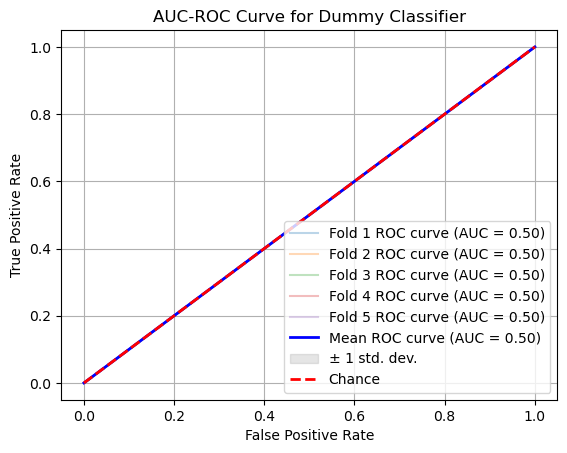

Model: Dummy Classifier
Training Accuracy: 0.5000
Test Accuracy (CV average): 0.7500
Training F1-Weighted Score: 0.3333
Test F1-Weighted Score (CV average): 0.6429
Balanced Accuracy (CV average): 0.5000
Training ROC-AUC Score (CV average): 0.5000
ROC-AUC Score (CV average): 0.5000
Precision (CV average): 0.5625
Recall (CV average): 0.7500
Specificity (CV average): 1.0000
Sensitivity (CV average): 0.0000
False Positive Rate (CV average): 0.0000
Model: Dummy Classifier done
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarn

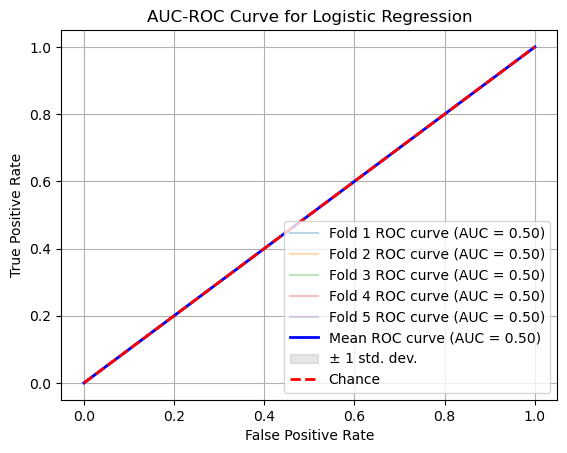

Model: Logistic Regression
Training Accuracy: 0.5000
Test Accuracy (CV average): 0.2500
Training F1-Weighted Score: 0.3333
Test F1-Weighted Score (CV average): 0.1000
Balanced Accuracy (CV average): 0.5000
Training ROC-AUC Score (CV average): 0.5000
ROC-AUC Score (CV average): 0.5000
Precision (CV average): 0.0625
Recall (CV average): 0.2500
Specificity (CV average): 0.0000
Sensitivity (CV average): 1.0000
False Positive Rate (CV average): 1.0000
Model: Logistic Regression done
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/home/user/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6.

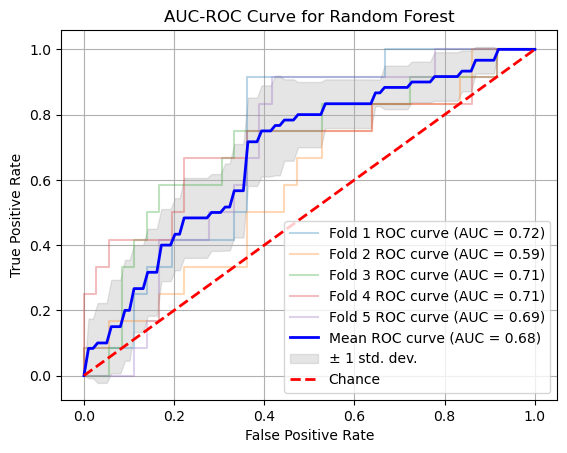

Model: Random Forest
Training Accuracy: 0.8439
Test Accuracy (CV average): 0.6208
Training F1-Weighted Score: 0.8410
Test F1-Weighted Score (CV average): 0.6410
Balanced Accuracy (CV average): 0.5861
Training ROC-AUC Score (CV average): 0.6836
ROC-AUC Score (CV average): 0.6837
Precision (CV average): 0.6860
Recall (CV average): 0.6208
Specificity (CV average): 0.6556
Sensitivity (CV average): 0.5167
False Positive Rate (CV average): 0.3444
Model: Random Forest done
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_par

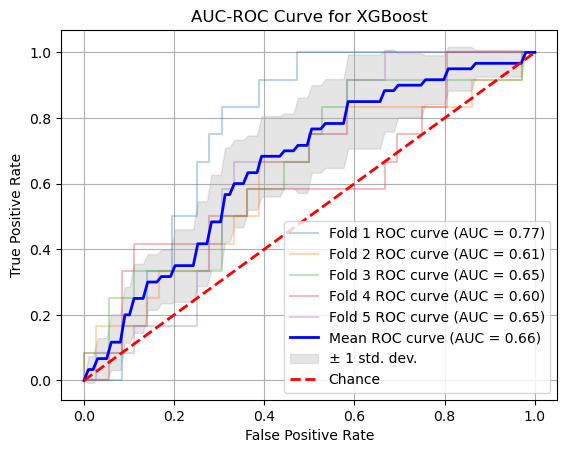

Model: XGBoost
Training Accuracy: 1.0000
Test Accuracy (CV average): 0.6958
Training F1-Weighted Score: 1.0000
Test F1-Weighted Score (CV average): 0.6766
Balanced Accuracy (CV average): 0.5528
Training ROC-AUC Score (CV average): 0.6381
ROC-AUC Score (CV average): 0.6571
Precision (CV average): 0.6815
Recall (CV average): 0.6958
Specificity (CV average): 0.8389
Sensitivity (CV average): 0.2667
False Positive Rate (CV average): 0.1611
Model: XGBoost done
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/user/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_par

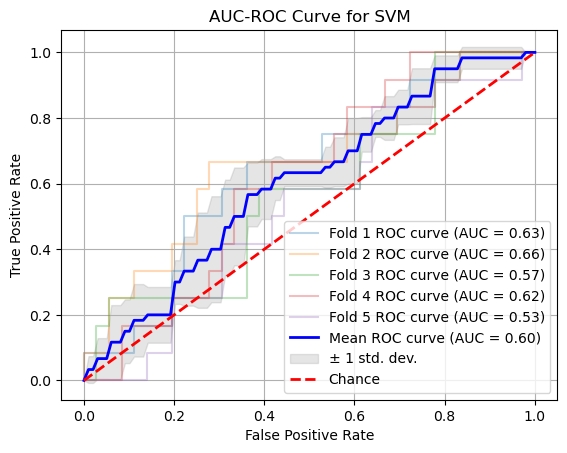

Model: SVM
Training Accuracy: 0.9409
Test Accuracy (CV average): 0.6500
Training F1-Weighted Score: 0.9407
Test F1-Weighted Score (CV average): 0.6393
Balanced Accuracy (CV average): 0.5056
Training ROC-AUC Score (CV average): 0.7364
ROC-AUC Score (CV average): 0.6040
Precision (CV average): 0.6318
Recall (CV average): 0.6500
Specificity (CV average): 0.7944
Sensitivity (CV average): 0.2167
False Positive Rate (CV average): 0.2056
Model: SVM done
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


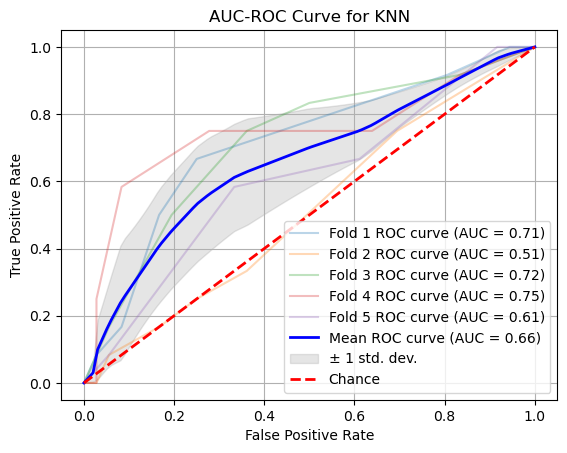

Model: KNN
Training Accuracy: 0.7197
Test Accuracy (CV average): 0.7625
Training F1-Weighted Score: 0.6709
Test F1-Weighted Score (CV average): 0.6767
Balanced Accuracy (CV average): 0.5306
Training ROC-AUC Score (CV average): 0.6014
ROC-AUC Score (CV average): 0.6589
Precision (CV average): 0.7214
Recall (CV average): 0.7625
Specificity (CV average): 0.9944
Sensitivity (CV average): 0.0667
False Positive Rate (CV average): 0.0056
Model: KNN done
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/user/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

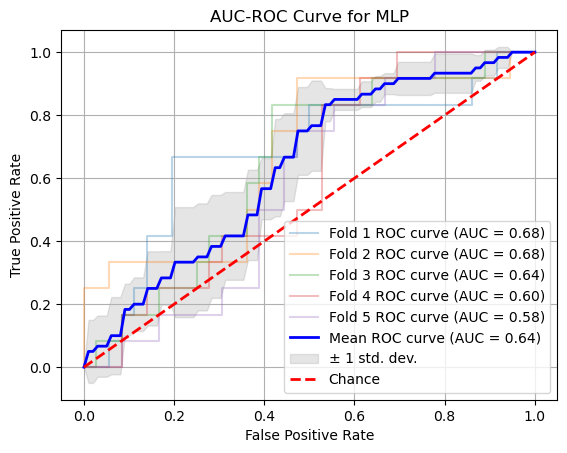

Model: MLP
Training Accuracy: 0.7006
Test Accuracy (CV average): 0.7042
Training F1-Weighted Score: 0.5773
Test F1-Weighted Score (CV average): 0.6887
Balanced Accuracy (CV average): 0.5639
Training ROC-AUC Score (CV average): 0.6343
ROC-AUC Score (CV average): 0.6354
Precision (CV average): 0.6844
Recall (CV average): 0.7042
Specificity (CV average): 0.8444
Sensitivity (CV average): 0.2833
False Positive Rate (CV average): 0.1556
Model: MLP done


In [21]:
dummy_model = None
dummy_grid = None
metrics_df = pd.DataFrame(
    {'metrics': ["accuracy_train", "f1_train", "roc_auc_train", "accuracy_test", "f1_test",
                                       "balanced_accuracy", "roc_auc", "precision", "recall","prc_auc", "specificity", 
                                       "sensitivity", "false_positive_rate"]
    }
)

model_iter = pd.DataFrame({
    'model': [dummy_model,logistic_model, rf_model, xgb_model, svm_model, knn_model, mlp_model],
    'param_grid': [dummy_grid,lr_param_grid, rf_param_grid, param_grid_xgb, svm_param_grid, knn_param_grid, mlp_param_grid],
    'model_name': ["Dummy Classifier","Logistic Regression", "Random Forest", "XGBoost", "SVM", "KNN", "MLP"]
})

for index,row in model_iter.iterrows():
    model = row['model']
    param_grid = row['param_grid']
    model_name = row['model_name']
    
    metrics, best_model, metrics_df_dge = train_model_with_gridsearch_metrics_all(
        model,
        param_grid,
        model_name,
        metrics_df,
        dge_f_X_train,
        y_train,
        dge_f_X_test,
        y_test,
        dataset='sf',
        scoring='roc_auc'
    )
    print(f"Model: {model_name} done")

In [22]:
print(metrics_df_dge)
metrics_df_dge.to_csv('metrics_df_dge.csv', index=False)

                metrics  Dummy Classifier  Logistic Regression  Random Forest  \
0        accuracy_train          0.500000             0.500000       0.843907   
1              f1_train          0.333333             0.333333       0.841018   
2         roc_auc_train          0.500000             0.500000       0.683636   
3         accuracy_test          0.750000             0.250000       0.620833   
4               f1_test          0.642857             0.100000       0.640981   
5     balanced_accuracy          0.500000             0.500000       0.586111   
6               roc_auc          0.500000             0.500000       0.683670   
7             precision          0.562500             0.062500       0.686012   
8                recall          0.750000             0.250000       0.620833   
9               prc_auc          0.250000             0.250000       0.443235   
10          specificity          1.000000             0.000000       0.655556   
11          sensitivity     

# 7. Pathway analysis

In [23]:
print(roc_common_gene)

['ENSG00000210140', 'ENSG00000156738', 'ENSG00000157601', 'ENSG00000199568', 'ENSG00000157551', 'ENSG00000189306', 'ENSG00000049759', 'ENSG00000112299', 'ENSG00000206865', 'ENSG00000104375', 'ENSG00000134539', 'ENSG00000141469', 'ENSG00000185745', 'ENSG00000111669', 'ENSG00000077984', 'ENSG00000166523', 'ENSG00000113658', 'ENSG00000197728', 'ENSG00000163736', 'ENSG00000231389', 'ENSG00000155115', 'ENSG00000114737', 'ENSG00000177868', 'ENSG00000162366', 'ENSG00000005249', 'ENSG00000213462', 'ENSG00000138722', 'ENSG00000105374', 'ENSG00000172543', 'ENSG00000134352', 'ENSG00000210144', 'ENSG00000140450', 'ENSG00000119917', 'ENSG00000151023', 'ENSG00000073792', 'ENSG00000134824', 'ENSG00000201096', 'ENSG00000266472', 'ENSG00000188243', 'ENSG00000127920', 'ENSG00000144218', 'ENSG00000152240', 'ENSG00000103121', 'ENSG00000239839', 'ENSG00000169902', 'ENSG00000202538', 'ENSG00000168765', 'ENSG00000137878', 'ENSG00000104219', 'ENSG00000152078', 'ENSG00000152926', 'ENSG00000091106', 'ENSG000001

In [41]:
import pandas as pd
from pybiomart import Dataset

# Find common elements and their positions
roc_dge_common_gene = [(value, dge_common_gene.index(value), roc_common_gene.index(value))
               for value in set(dge_common_gene) & set(roc_common_gene)]

# Create ensembl gene dataset
dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

# Define your Ensembl gene IDs
ensembl_ids_ml = roc_common_gene
ensembl_ids_dge = dge_common_gene
ensembl_ids_common_gene = [value for value, _, _ in roc_dge_common_gene]
all_ml = array_rlr_roc_feature_set

# Query the dataset to get gene symbols
selected_genes_info = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', 'description'],
                          filters={'link_ensembl_gene_id': ensembl_ids_ml})
DE_genes_info = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', 'description'],
                          filters={'link_ensembl_gene_id': ensembl_ids_dge})
common_genes_info = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', 'description'],
                          filters={'link_ensembl_gene_id': ensembl_ids_common_gene})
all_ml_info = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', 'description'],
                          filters={'link_ensembl_gene_id': all_ml})

# Convert to DataFrame if needed
selected_genes_info_df = pd.DataFrame(selected_genes_info)
DE_genes_info_df = pd.DataFrame(DE_genes_info)
common_genes_info = pd.DataFrame(common_genes_info)
all_ml_info_df = pd.DataFrame(all_ml_info)

print(selected_genes_info_df)

     Gene stable ID  Gene name  \
0   ENSG00000005249    PRKAR2B   
1   ENSG00000049759     NEDD4L   
2   ENSG00000073792    IGF2BP2   
3   ENSG00000077984       CST7   
4   ENSG00000091106      NLRC4   
5   ENSG00000103121       CMC2   
6   ENSG00000104219     ZDHHC2   
7   ENSG00000104375       STK3   
8   ENSG00000105374       NKG7   
9   ENSG00000111669       TPI1   
10  ENSG00000112299       VNN1   
11  ENSG00000113658      SMAD5   
12  ENSG00000114737       CISH   
13  ENSG00000119917      IFIT3   
14  ENSG00000127920      GNG11   
15  ENSG00000134352      IL6ST   
16  ENSG00000134539      KLRD1   
17  ENSG00000134824      FADS2   
18  ENSG00000137876    RSL24D1   
19  ENSG00000137878      GCOM1   
20  ENSG00000138722      MMRN1   
21  ENSG00000140416       TPM1   
22  ENSG00000140450     ARRDC4   
23  ENSG00000141469    SLC14A1   
24  ENSG00000144218       AFF3   
25  ENSG00000149131   SERPING1   
26  ENSG00000151023      ENKUR   
27  ENSG00000152078      TLCD4   
28  ENSG000001

In [42]:
# Extract text before "[Source:"
selected_genes_info_df['Gene description'] = selected_genes_info_df['Gene description'].str.extract(r'([^[]+)')
DE_genes_info_df['Gene description'] = DE_genes_info_df['Gene description'].str.extract(r'([^[]+)')
common_genes_info['Gene description'] = common_genes_info['Gene description'].str.extract(r'([^[]+)')
all_ml_info_df['Gene description'] = all_ml_info_df['Gene description'].str.extract(r'([^[]+)')

# Get ranking from previous importance list
selected_genes_info_df['Ranking'] = selected_genes_info_df['Gene stable ID'].apply(lambda x: roc_common_gene.index(x) if x in roc_common_gene else float('inf'))
DE_genes_info_df['Ranking'] = DE_genes_info_df['Gene stable ID'].apply(lambda x: dge_common_gene.index(x) if x in dge_common_gene else float('inf'))
all_ml_info_df['Ranking'] = all_ml_info_df['Gene stable ID'].apply(lambda x: array_rlr_roc_feature_set.index(x) if x in array_rlr_roc_feature_set else float('inf'))

# make ranking start with 1
selected_genes_info_df['Ranking'] = selected_genes_info_df['Ranking'] + 1
DE_genes_info_df['Ranking'] = DE_genes_info_df['Ranking'] + 1
all_ml_info_df['Ranking'] = all_ml_info_df['Ranking'] + 1

# sort by ranking
selected_genes_info_sorted_df = selected_genes_info_df.sort_values(by='Ranking').reset_index(drop=True)
DE_genes_info_sorted_df = DE_genes_info_df.sort_values(by='Ranking').reset_index(drop=True)
all_ml_info_df = all_ml_info_df.sort_values(by='Ranking').reset_index(drop=True)

DE_genes_info_sorted_df.to_csv('DE_genes_info_sorted_df.csv', index=False)
print(DE_genes_info_sorted_df)
selected_genes_info_sorted_df.to_csv('selected_genes_info_sorted_df.csv', index=False)
print(selected_genes_info_sorted_df)
all_ml_info_df.to_csv('all_ml_info_df.csv', index=False)


     Gene stable ID  Gene name  \
0   ENSG00000202538     RNU4-2   
1   ENSG00000220804  LINC01881   
2   ENSG00000213462     ERV3-1   
3   ENSG00000252010    SCARNA5   
4   ENSG00000138722      MMRN1   
5   ENSG00000077984       CST7   
6   ENSG00000158825        CDA   
7   ENSG00000207475   SNORA80E   
8   ENSG00000186468      RPS23   
9   ENSG00000064687      ABCA7   
10  ENSG00000199347    RNU5E-1   
11  ENSG00000172543       CTSW   
12  ENSG00000157551     KCNJ15   
13  ENSG00000262879        NaN   
14  ENSG00000022567    SLC45A4   
15  ENSG00000142405     NLRP12   
16  ENSG00000157600    TMEM164   
17  ENSG00000199990   VTRNA1-1   
18  ENSG00000200291      Y_RNA   
19  ENSG00000005249    PRKAR2B   
20  ENSG00000170525     PFKFB3   
21  ENSG00000210140      MT-TC   
22  ENSG00000175550      DRAP1   
23  ENSG00000200741  RNA5SP161   
24  ENSG00000117115      PADI2   
25  ENSG00000134824      FADS2   
26  ENSG00000166825      ANPEP   
27  ENSG00000242125      SNHG3   
28  ENSG000001

In [26]:
selected_genes_info_sorted_df['Gene name'].tolist()

['MT-TC',
 'MS4A1',
 'MX1',
 'RNU5A-1',
 'KCNJ15',
 'RRP7A',
 'NEDD4L',
 'VNN1',
 'Y_RNA',
 'STK3',
 'KLRD1',
 'SLC14A1',
 'IFIT1',
 'TPI1',
 'CST7',
 'CLEC4E',
 'SMAD5',
 'RPS26',
 'PPBP',
 'HLA-DPA1',
 'GTF3C6',
 'CISH',
 'SVBP',
 'PDZK1IP1',
 'PRKAR2B',
 'ERV3-1',
 'MMRN1',
 'NKG7',
 'CTSW',
 'IL6ST',
 'MT-TY',
 'ARRDC4',
 'IFIT3',
 'ENKUR',
 'IGF2BP2',
 'FADS2',
 'RNA5SP387',
 'MRPS21',
 'COMMD6',
 'GNG11',
 'AFF3',
 'HAUS1',
 'CMC2',
 'DEFA3',
 'TPST1',
 'RNU4-2',
 'GSTM4',
 'GCOM1',
 'ZDHHC2',
 'TLCD4',
 'ZNF117',
 'NLRC4',
 'RPS23',
 'SERPING1',
 'RSL24D1',
 'GARS1-DT',
 'TPM1']

In [43]:
# Create a DataFrame from the common_gene data
df_common = pd.DataFrame(roc_dge_common_gene, columns=['value', 'DE ranking', 'Feature importance ranking'])


# Merge
common_genes_info_ranked = common_genes_info.merge(df_common, left_on='Gene stable ID', right_on='value', how='left').drop(columns='value')
common_genes_info_ranked['score']= common_genes_info_ranked[['Feature importance ranking','DE ranking']].mean(axis=1)

# sort
common_genes_info_ranked_sorted = common_genes_info_ranked.sort_values(by='score').reset_index(drop=True)
common_genes_info_ranked_sorted.drop(columns=['score'], inplace=True)
common_genes_info_ranked_sorted['DE ranking'] = common_genes_info_ranked_sorted['DE ranking'] + 1
common_genes_info_ranked_sorted['Feature importance ranking'] = common_genes_info_ranked_sorted['Feature importance ranking'] + 1


common_genes_info_ranked_sorted.to_csv('common_genes_info_ranked_sorted.csv', index=False)
print(common_genes_info_ranked_sorted)

     Gene stable ID Gene name  \
0   ENSG00000157551    KCNJ15   
1   ENSG00000077984      CST7   
2   ENSG00000210140     MT-TC   
3   ENSG00000213462    ERV3-1   
4   ENSG00000138722     MMRN1   
5   ENSG00000172543      CTSW   
6   ENSG00000005249   PRKAR2B   
7   ENSG00000202538    RNU4-2   
8   ENSG00000189306     RRP7A   
9   ENSG00000206865     Y_RNA   
10  ENSG00000163736      PPBP   
11  ENSG00000186468     RPS23   
12  ENSG00000134824     FADS2   
13  ENSG00000210144     MT-TY   
14  ENSG00000151023     ENKUR   

                                     Gene description  DE ranking  \
0   potassium inwardly rectifying channel subfamil...          13   
1                                         cystatin F            6   
2           mitochondrially encoded tRNA-Cys (UGU/C)           23   
3   endogenous retrovirus group 3 member 1, envelope            3   
4                                       multimerin 1            5   
5                                        cathepsin W     

In [28]:
import pandas as pd
from Bio import Entrez

# Always tell NCBI who you are
Entrez.email = "markkawinlerdprapapong@gmail.com"
Entrez.api_key = "0241a4ccffd07431de1bde01810d4b40d209"  # Add your NCBI API key here

def pubmed_search_genes(genes):
    # Creating search terms for pre-eclampsia
    find1 = [term + ' AND pre-eclampsia' for term in genes]
    find2 = [term + ' AND preeclampsia' for term in genes]
    
    # Combine search terms
    Find_combined = find1 + find2

    # Function to get abstracts from PubMed
    def get_abstract(pmid):
        handle = Entrez.efetch(db='pubmed', id=pmid, retmode='text', rettype='abstract')
        return handle.read()

    # Function to search PubMed and collect abstracts
    def pubmed_search(terms, retmax=100):
        pubmedsearch = []
        for i in terms:
            handle = Entrez.esearch(db="pubmed", term=i, retmax=retmax)
            record = Entrez.read(handle)
            if len(record["IdList"]) > 0:
                pubmedsearch.append(
                    {
                        'feature': i,
                        'pubmedID': record["IdList"],
                    })
        first_search = pd.DataFrame(pubmedsearch)
        df_explode = first_search.explode('pubmedID')
        df_explode = df_explode.sort_values(by='pubmedID').reset_index(drop=True)
        return df_explode

    # Search and retrieve abstracts for the combined terms
    df_explode = pubmed_search(Find_combined)

    # Collect abstracts
    Abstracts = []
    for n in df_explode['pubmedID']:
        Abstracts.append(
            {
                'pubmedID': n,
                'Abstract': get_abstract(n),
            }
        )

    Abstracts = pd.DataFrame(Abstracts)
    Abstracts = Abstracts.sort_values(by='pubmedID').reset_index()

    # Combine search results with abstracts
    Compiled = pd.DataFrame(df_explode.join(Abstracts['Abstract']))
    Compiled = Compiled.groupby('pubmedID').agg({'feature': ','.join, 'Abstract': 'first'})
    
    # Save results to Excel
    Compiled.to_excel('PreEclampsia_search.xlsx', index=False)
    print("Search results saved to 'PreEclampsia_search.xlsx'")

# Call the function with your gene list
pubmed_search_genes(selected_genes_info_sorted_df['Gene name'])

Search results saved to 'PreEclampsia_search.xlsx'


In [46]:
import pandas as pd
from Bio import Entrez

# Always tell NCBI who you are
Entrez.email = "markkawinlerdprapapong@gmail.com"
Entrez.api_key = "e3858ec8b098af9f63f59d96495fa2a41d08"  # Add your NCBI API key here

def pubmed_search_genes(genes):
    # Creating search terms for pre-eclampsia
    genes = [str(item) for item in genes]
    find1 = [term + ' AND pre-eclampsia' for term in genes]
    find2 = [term + ' AND preeclampsia' for term in genes]
    
    # Combine search terms
    Find_combined = find1 + find2

    # Function to get abstracts from PubMed
    def get_abstract(pmid):
        handle = Entrez.efetch(db='pubmed', id=pmid, retmode='text', rettype='abstract')
        return handle.read()

    # Function to search PubMed and collect abstracts
    def pubmed_search(terms, retmax=100):
        pubmedsearch = []
        for i in terms:
            handle = Entrez.esearch(db="pubmed", term=i, retmax=retmax)
            record = Entrez.read(handle)
            if len(record["IdList"]) > 0:
                pubmedsearch.append(
                    {
                        'feature': i,
                        'pubmedID': record["IdList"],
                    })
        first_search = pd.DataFrame(pubmedsearch)
        df_explode = first_search.explode('pubmedID')
        df_explode = df_explode.sort_values(by='pubmedID').reset_index(drop=True)
        return df_explode

    # Search and retrieve abstracts for the combined terms
    df_explode = pubmed_search(Find_combined)

    # Collect abstracts
    Abstracts = []
    for n in df_explode['pubmedID']:
        Abstracts.append(
            {
                'pubmedID': n,
                'Abstract': get_abstract(n),
            }
        )

    Abstracts = pd.DataFrame(Abstracts)
    Abstracts = Abstracts.sort_values(by='pubmedID').reset_index()

    # Combine search results with abstracts
    Compiled = pd.DataFrame(df_explode.join(Abstracts['Abstract']))
    Compiled = Compiled.groupby('pubmedID').agg({'feature': ','.join, 'Abstract': 'first'})
    
    # Save results to Excel
    Compiled.to_excel('PreEclampsia_search_2.xlsx', index=False)
    print("Search results saved to 'PreEclampsia_search_2.xlsx'")

ml_selected_genes = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'],
                          filters={'link_ensembl_gene_id': array_rlr_roc_feature_set})

# Convert to DataFrame if needed
ml_selected_genes_df = pd.DataFrame(ml_selected_genes)

# Call the function with your gene list
pubmed_search_genes(ml_selected_genes_df['Gene name'])

HTTPError: HTTP Error 400: Bad Request

# 8. Prediction on subset

In [29]:
target_test['dx_subt'].value_counts()

dx_subt
normal         180
late-onset      48
early-onset     12
Name: count, dtype: int64

In [30]:
# Filter y_target to include only rows where 'dx_subt' is 'normal' or 'late-onset'
lo_target_test = target_test[target_test['dx_subt'].isin(['normal', 'late-onset'])]
eo_target_test = target_test[target_test['dx_subt'].isin(['normal', 'early-onset'])]

# Use the index of the filtered y_target to filter X_test
lo_X_test = roc_f_X_test.loc[lo_target_test.index]
eo_X_test = roc_f_X_test.loc[eo_target_test.index]

print(f"X_test shape: ", X_test.shape)
print(f"eo_X_test shape: ", eo_X_test.shape)

lo_y_test = lo_target_test['dx_subt'].map({'late-onset': 1, 'normal': 0})
eo_y_test = eo_target_test['dx_subt'].map({'early-onset': 1, 'normal': 0})

print(f"eo_y_test table: ",eo_y_test.value_counts())

X_test shape:  (240, 7160)
eo_X_test shape:  (192, 57)
eo_y_test table:  dx_subt
0    180
1     12
Name: count, dtype: int64


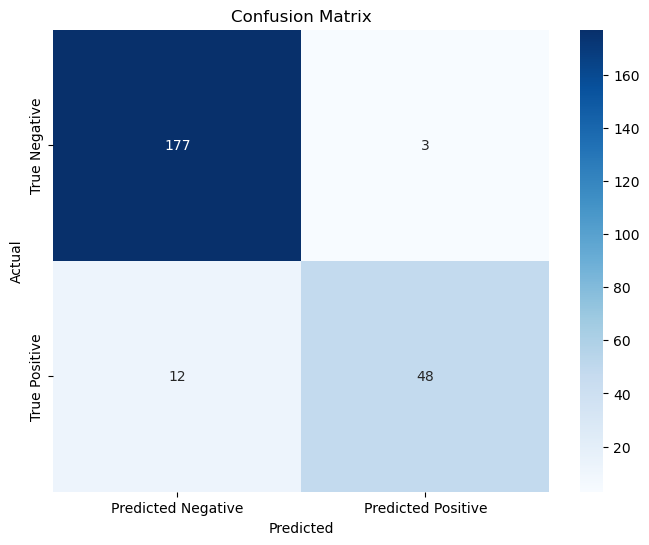

                 Metric       Value
0       Accuracy (Test)    0.937500
1       F1 Score (Test)    0.864865
2     Balanced Accuracy    0.891667
3               ROC AUC    0.969074
4             Precision    0.941176
5                Recall    0.800000
6               PRC AUC    0.949605
7           Specificity    0.983333
8           Sensitivity    0.800000
9   False Positive Rate    0.016667
10       True Negatives  177.000000
11      False Positives    3.000000
12      False Negatives   12.000000
13       True Positives   48.000000


In [35]:
metrics = evaluate_model_performance_with_plot(optim_xgb, roc_f_X_test, y_test)
print(metrics)

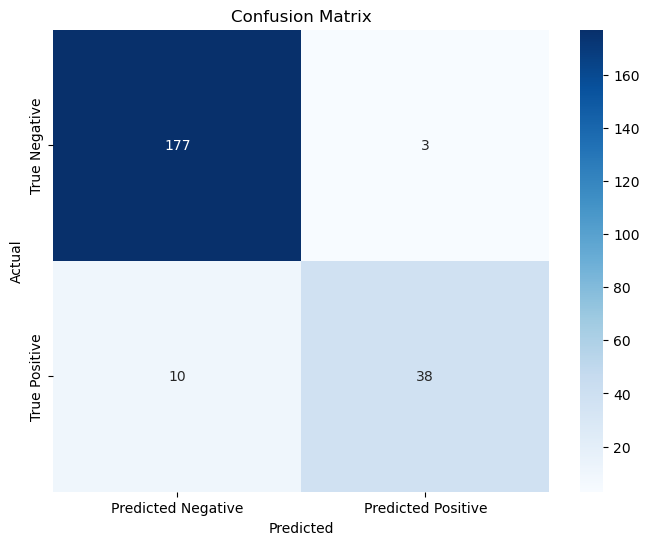

                 Metric       Value
0       Accuracy (Test)    0.942982
1       F1 Score (Test)    0.853933
2     Balanced Accuracy    0.887500
3               ROC AUC    0.963079
4             Precision    0.926829
5                Recall    0.791667
6               PRC AUC    0.933989
7           Specificity    0.983333
8           Sensitivity    0.791667
9   False Positive Rate    0.016667
10       True Negatives  177.000000
11      False Positives    3.000000
12      False Negatives   10.000000
13       True Positives   38.000000


In [31]:
lo_metrics = evaluate_model_performance_with_plot(optim_xgb, lo_X_test, lo_y_test)
print(lo_metrics)

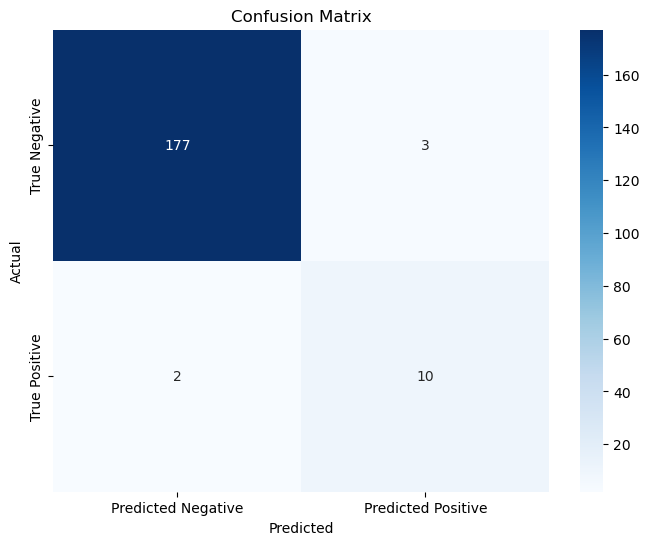

                 Metric       Value
0       Accuracy (Test)    0.973958
1       F1 Score (Test)    0.800000
2     Balanced Accuracy    0.908333
3               ROC AUC    0.993056
4             Precision    0.769231
5                Recall    0.833333
6               PRC AUC    0.938884
7           Specificity    0.983333
8           Sensitivity    0.833333
9   False Positive Rate    0.016667
10       True Negatives  177.000000
11      False Positives    3.000000
12      False Negatives    2.000000
13       True Positives   10.000000


In [32]:
eo_metrics = evaluate_model_performance_with_plot(optim_xgb, eo_X_test, eo_y_test)
print(eo_metrics)

In [33]:
combined_df = pd.merge(eo_metrics, lo_metrics, on="Metric", how="outer")
combined_df = combined_df.rename(columns={'Value_x': 'early-onset', 'Value_y': 'late-onset'})
print(combined_df)

                 Metric  early-onset  late-onset
0       Accuracy (Test)     0.973958    0.942982
1       F1 Score (Test)     0.800000    0.853933
2     Balanced Accuracy     0.908333    0.887500
3               ROC AUC     0.993056    0.963079
4             Precision     0.769231    0.926829
5                Recall     0.833333    0.791667
6               PRC AUC     0.938884    0.933989
7           Specificity     0.983333    0.983333
8           Sensitivity     0.833333    0.791667
9   False Positive Rate     0.016667    0.016667
10       True Negatives   177.000000  177.000000
11      False Positives     3.000000    3.000000
12      False Negatives     2.000000   10.000000
13       True Positives    10.000000   38.000000
